In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
gdf = gpd.read_file('INTERMAT_LIM_LIMITE_POLITICO_ADMINISTRATIVO_A.shp')
print(gdf.head())

#print('\n', gdf.columns)

   objectid_1  objectid                  mn_no            mn_ato  mn_dt_ato  \
0        2585     102.0               ACORIZAL  Lei Est. n° 5051 1986-09-11   
1        2642       1.0  BOM JESUS DO ARAGUAIA  Lei Est. n° 7174 1999-09-29   
2        2663     114.0                  JAURU  Lei Est. n° 7890 2003-03-13   
3        2664     126.0   VALE DE SÃO DOMINGOS   Lei Est n° 7231 1999-12-28   
4        2648      93.0  FIGUEIRÓPOLIS D'OESTE  Lei Est. n° 5015 1986-05-13   

    mn_cod    mn_calc_h  mn_calc_k  \
0  5100102   85013.0468   850.1305   
1  5101852  426395.9152  4263.9592   
2  5105002  120675.7500  1206.7575   
3  5108352  206145.7611  2061.4576   
4  5103809   89156.3070   891.5631   

                                            mapa_pdf  \
0  https://intergeo.intermat.mt.gov.br/portal/sha...   
1  https://intergeo.intermat.mt.gov.br/portal/sha...   
2  https://intergeo.intermat.mt.gov.br/portal/sha...   
3  https://intergeo.intermat.mt.gov.br/portal/sha...   
4  https://inter

In [2]:
cidade_especifica = gdf[gdf['mn_no'] == 'CUIABÁ']
print(cidade_especifica)

    objectid_1  objectid   mn_no            mn_ato  mn_dt_ato   mn_cod  \
14        2546      94.0  CUIABÁ  Lei Est. n° 5014 1986-05-13  5103403   

      mn_calc_h  mn_calc_k                                           mapa_pdf  \
14  330102.2632  3301.0226  https://intergeo.intermat.mt.gov.br/portal/sha...   

                                             geometry  
14  POLYGON ((-56.14595 -15.76768, -56.14604 -15.7...  


C:\Users\acer\AppData\Local\Temp\ipykernel_1352\2472930092.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


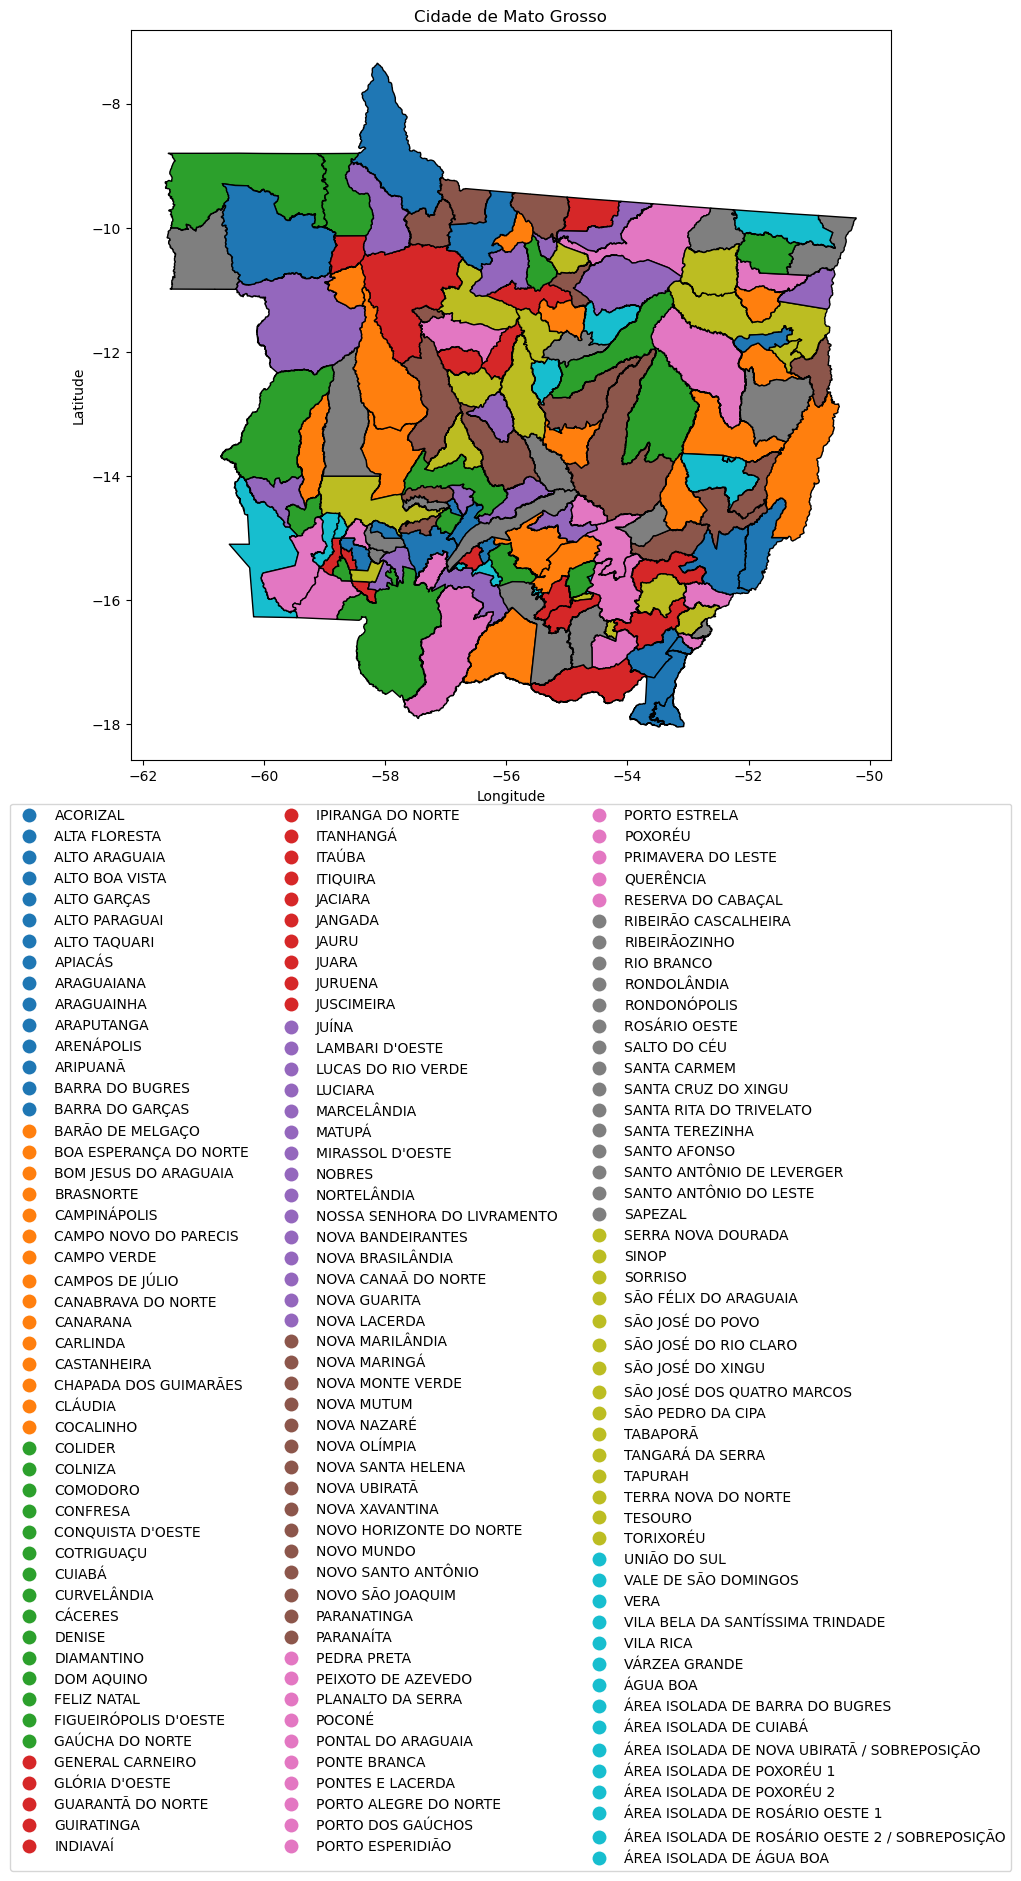

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='mn_no', legend=True, 
         edgecolor='black', ax=ax, legend_kwds={
             'loc': 'upper center', 
             'bbox_to_anchor': (0.5, -0.05), 
             'ncol': 3,
             'fmt': "{:.0f}" # Se for número, ajuda a formatar
         })
plt.title('Cidade de Mato Grosso')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#legend = ax.legend(*ax.get_legend_handles_labels(), loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=6)
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

In [17]:
import pandas as pd
gdf['mn_dt_ato'] = pd.to_datetime(gdf['mn_dt_ato'])
mais_novos = gdf.sort_values(by='mn_dt_ato', ascending=False).head(6)
mais_antigos = gdf.sort_values(by='mn_dt_ato', ascending=True).head(6)
print(mais_novos[['mn_no', 'mn_dt_ato']]) 
print(mais_antigos[['mn_no', 'mn_dt_ato']])

             mn_no  mn_dt_ato
130  ALTO ARAGUAIA 2024-01-05
11    ALTO TAQUARI 2024-01-05
82         JACIARA 2021-06-14
47         TAPURAH 2020-03-29
116  ROSÁRIO OESTE 2006-01-13
136        JURUENA 2004-04-20
                                           mn_no  mn_dt_ato
93   ÁREA ISOLADA DE NOVA UBIRATÃ / SOBREPOSIÇÃO 1899-12-30
111                                       POCONÉ 1943-12-31
32                                 VÁRZEA GRANDE 1953-12-11
69                   NOSSA SENHORA DO LIVRAMENTO 1954-07-31
61                                   ALTO GARÇAS 1963-11-11
22                              BARÃO DE MELGAÇO 1963-11-11


In [4]:
municipios = gdf['mn_no'].unique()
print(f"Total Registros:{len(municipios)}")
print(municipios)

Total Registros:150
['ACORIZAL' 'BOM JESUS DO ARAGUAIA' 'JAURU' 'VALE DE SÃO DOMINGOS'
 "FIGUEIRÓPOLIS D'OESTE" 'SANTO AFONSO' 'CAMPOS DE JÚLIO'
 "LAMBARI D'OESTE" 'SÃO PEDRO DA CIPA' "CONQUISTA D'OESTE" 'VERA'
 'ALTO TAQUARI' 'CAMPO NOVO DO PARECIS' 'NOVA MONTE VERDE' 'CUIABÁ'
 'PORTO ALEGRE DO NORTE' 'SANTA RITA DO TRIVELATO' 'TABAPORÃ'
 'PORTO DOS GAÚCHOS' 'ARAGUAIANA' 'CÁCERES' 'RONDOLÂNDIA'
 'BARÃO DE MELGAÇO' 'SÃO FÉLIX DO ARAGUAIA' 'COCALINHO' 'APIACÁS'
 'NOVO SANTO ANTÔNIO' 'INDIAVAÍ' 'NOVA XAVANTINA' 'SANTA TEREZINHA'
 'CANABRAVA DO NORTE' 'TORIXORÉU' 'VÁRZEA GRANDE' 'COLNIZA'
 'PEIXOTO DE AZEVEDO' 'GUARANTÃ DO NORTE' 'GAÚCHA DO NORTE' 'SANTA CARMEM'
 'VILA BELA DA SANTÍSSIMA TRINDADE' 'CAMPINÁPOLIS'
 'NOVO HORIZONTE DO NORTE' 'RESERVA DO CABAÇAL' 'TANGARÁ DA SERRA'
 'SÃO JOSÉ DO POVO' 'ALTO PARAGUAI' 'IPIRANGA DO NORTE' 'DIAMANTINO'
 'TAPURAH' 'SÃO JOSÉ DO RIO CLARO' 'SERRA NOVA DOURADA'
 'ÁREA ISOLADA DE CUIABÁ' 'SAPEZAL' 'ITAÚBA' 'NOVO SÃO JOAQUIM' 'CONFRESA'
 'GUIRATINGA' 

In [5]:
gdf['area_calculada'] = gdf.geometry.area
maiores = gdf.nlargest(5, 'area_calculada')[['mn_no', 'area_calculada']]
print(maiores)

           mn_no  area_calculada
33       COLNIZA        2.301008
75         JUÍNA        2.187632
20       CÁCERES        2.079362
120     ARIPUANÃ        2.036132
59   PARANATINGA        2.015964


C:\Users\acer\AppData\Local\Temp\ipykernel_1352\2806000889.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['area_calculada'] = gdf.geometry.area


In [6]:
area_total = gdf['mn_calc_k'].sum()
print(f"Área total mapeada: {area_total:.2f} km²")

Área total mapeada: 899675.38 km²


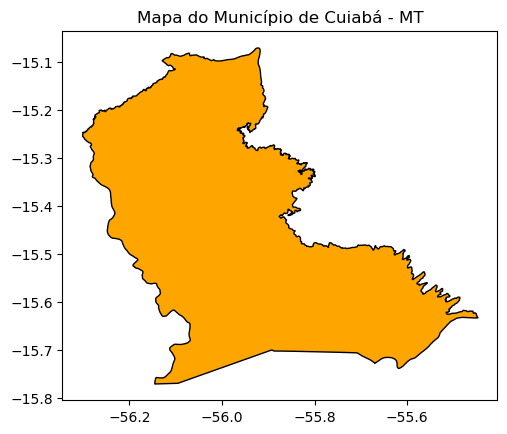

In [9]:
jauru = gdf[gdf['mn_no'] == 'CUIABÁ']
jauru.plot(edgecolor='black', color='orange')
plt.title('Mapa do Município de Cuiabá - MT')
plt.show()

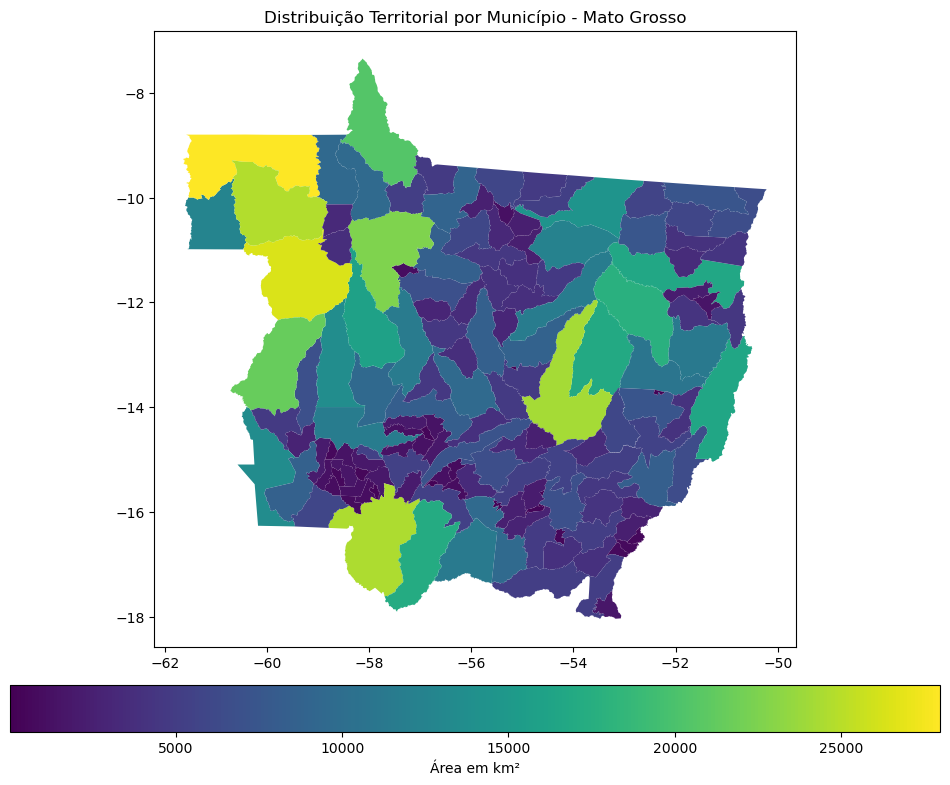

In [10]:
fig, ax = plt.subplots(figsize=(12, 10))

# Criando um mapa baseado na área (mn_calc_k)
gdf.plot(column='mn_calc_k', 
         cmap='viridis', 
         legend=True, 
         ax=ax,
         legend_kwds={'label': "Área em km²", 'orientation': "horizontal", 'pad': 0.05})

plt.title('Distribuição Territorial por Município - Mato Grosso')
plt.show()

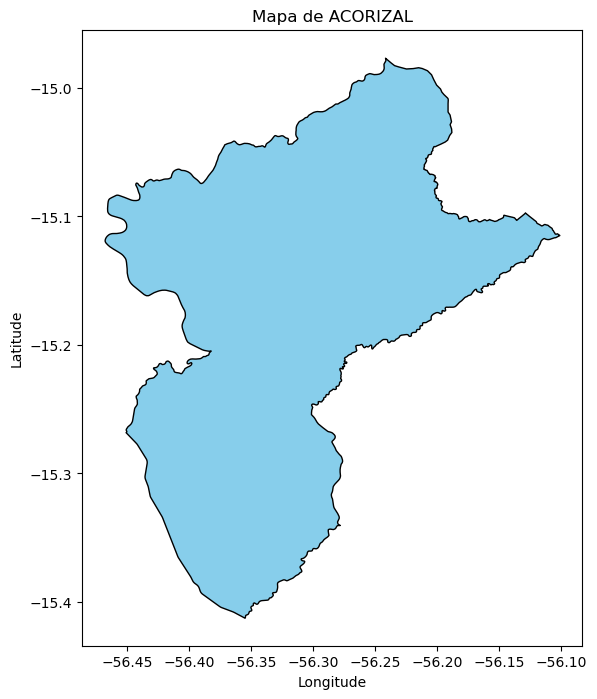

In [23]:
import matplotlib.pyplot as plt

# Filtrar
cidade_especifica = gdf[gdf['mn_no'] == 'ACORIZAL']

# Plotar
fig, ax = plt.subplots(figsize=(8, 8))
cidade_especifica.plot(ax=ax, color='skyblue', edgecolor='black')

plt.title(f"Mapa de {cidade_especifica['mn_no'].values[0]}")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

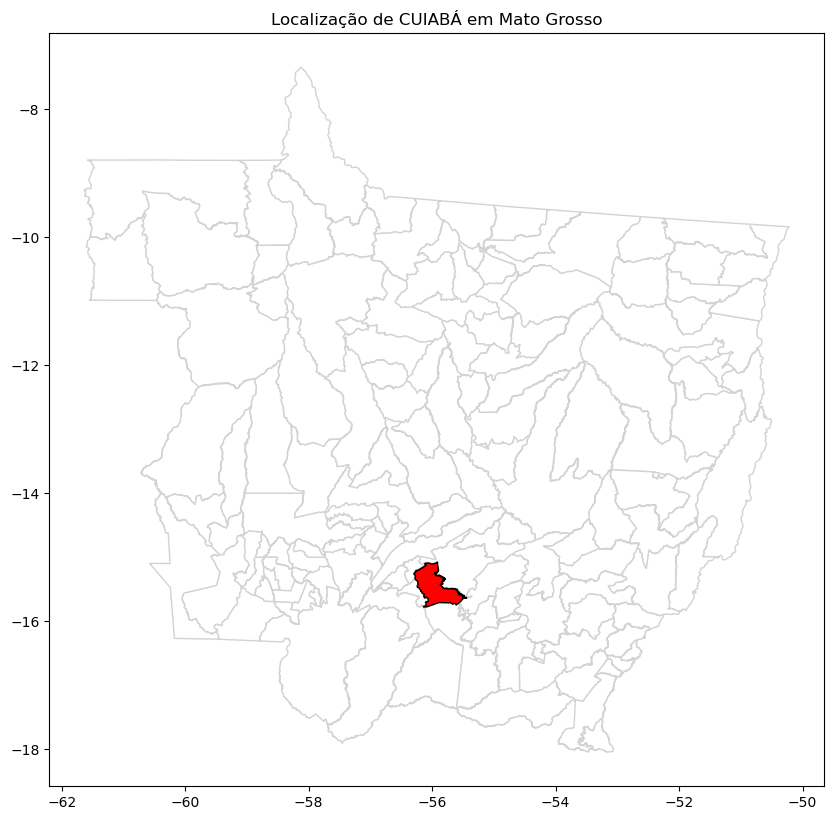

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))

# 1. Desenha todos os municípios (fundo)
gdf.plot(ax=ax, color='white', edgecolor='lightgrey')

# 2. Desenha a cidade filtrada (destaque)
cidade_alvo = 'CUIABÁ'
gdf[gdf['mn_no'] == cidade_alvo].plot(ax=ax, color='red', edgecolor='black')

plt.title(f'Localização de {cidade_alvo} em Mato Grosso')
plt.show()

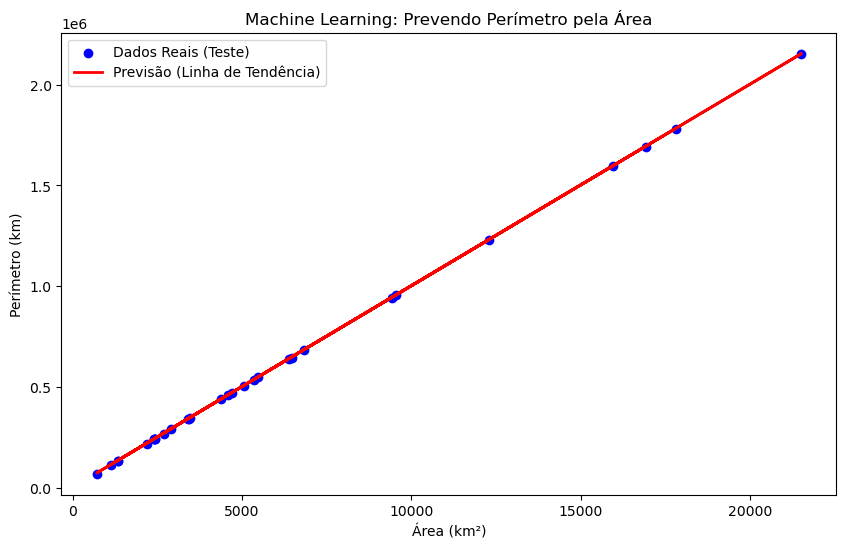

Para uma área de 5000 km², o modelo prevê um perímetro de: 503124.16 km


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Preparando os dados (Usando o seu GeoDataFrame)
# X (Atributo/Feature): Área | y (Alvo/Target): Perímetro
X = gdf[['mn_calc_k']].values # O modelo espera um array 2D
y = gdf['mn_calc_h'].values

# 2. Dividindo os dados: Treino (80%) e Teste (20%)

# Isso serve para checar se o modelo aprendeu mesmo ou só "decorou"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Criando e Treinando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train) # É aqui que a "mágica" acontece

# 4. Fazendo previsões com os dados de teste
previsoes = modelo.predict(X_test)

# 5. Visualizando o resultado
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Dados Reais (Teste)')
plt.plot(X_test, previsoes, color='red', linewidth=2, label='Previsão (Linha de Tendência)')
plt.title('Machine Learning: Prevendo Perímetro pela Área')
plt.xlabel('Área (km²)')
plt.ylabel('Perímetro (km)')
plt.legend()
plt.show()

# 6. Testando com um valor novo
area_nova = [[5000]] # Imagine um município novo com 5000 km²
perimetro_previsto = modelo.predict(area_nova)
print(f"Para uma área de 5000 km², o modelo prevê um perímetro de: {perimetro_previsto[0]:.2f} km")

In [14]:
pip install sidrapy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import sidrapy
import pandas as pd
import time

# 1. FUNÇÃO DA API COM SISTEMA DE TENTATIVAS (RETRIES)
def buscar_dados_ibge_robusto(codigo_ibge):
    cod = str(codigo_ibge).strip().split('.')[0]
    resultado = {"pop": "Indisponível", "agro": "Indisponível"}
    
    # Tentativa para População
    for i in range(3):
        try:
            df = sidrapy.get_table(table_code="4714", territorial_level="6", 
                                   ibge_territorial_code=cod, variable="93", timeout=5)
            if len(df) > 1:
                resultado["pop"] = f"{int(df.iloc[1]['V']):,}".replace(",", ".")
                break # Sucesso, sai do loop da pop
        except:
            time.sleep(1) # Espera 1 seg antes de tentar de novo

    # Tentativa para Agricultura (Tabela 1612)
    for i in range(10):
        try:
            df = sidrapy.get_table(table_code="1612", territorial_level="6", 
                                   ibge_territorial_code=cod, variable="214", timeout=5)
            if len(df) > 1:
                resultado["agro"] = f"R$ {int(df.iloc[1]['V']):,}".replace(",", ".")
                break # Sucesso, sai do loop da agro
        except:
            time.sleep(1)
            
    return resultado

# 2. INTERFACE
cidades_lista = sorted(gdf['mn_no'].unique())
seletor = widgets.Dropdown(options=cidades_lista, description='Cidade:')
botao = widgets.Button(description="Gerar Mapa", button_style='success')
saida = widgets.Output()

# 3. FUNÇÃO PRINCIPAL
def ao_clicar(b):
    with saida:
        clear_output(wait=True)
        nome_escolhido = seletor.value
        cidade_gdf = gdf[gdf['mn_no'] == nome_escolhido]
        info = cidade_gdf.iloc[0]
        
        # MENSAGENS DE STATUS QUE VOCÊ GOSTOU
        print(f"📡 Conectando ao servidor do IBGE para {nome_escolhido}...")
        print(f"🔍 Tentando obter dados socioeconômicos (Tentativas de 1 a 3)...")
        
        dados = buscar_dados_ibge_robusto(info['mn_cod'])
        
        clear_output(wait=True) # Limpa as mensagens após conseguir os dados

        # TRATAMENTO DA DATA
        try:
            data_formatada = pd.to_datetime(str(info['mn_dt_ato'])).strftime('%d/%m/%Y')
        except:
            data_formatada = info['mn_dt_ato']

        # PLOTAGEM
        fig, ax = plt.subplots(figsize=(10, 6))
        gdf.plot(ax=ax, color='#e0e0e0', edgecolor='white')
        cidade_gdf.plot(ax=ax, color='red', edgecolor='black')
        
        ax.set_title(f"Análise de Município: {nome_escolhido}", fontsize=14, fontweight='bold')
        ax.axis('off')

        # CAIXA DE INFORMAÇÕES
        texto_info = (
            f"MUNICÍPIO: {nome_escolhido}\n"
            f"{'='*25}\n"
            f"População (2022): {dados['pop']}\n"
            f"Prod. Agrícola: {dados['agro']}\n"
            f"Área: {info['mn_calc_k']:.2f} km²\n"
            f"Criação: {data_formatada}\n"
            f"Cód. IBGE: {info['mn_cod']}"
        )

        ax.text(1.05, 0.5, texto_info, 
                transform=ax.transAxes, 
                fontsize=11,
                verticalalignment='center', 
                family='monospace',
                bbox=dict(boxstyle='round,pad=1', facecolor='white', alpha=0.9, edgecolor='red'))

        plt.subplots_adjust(right=0.7)
        plt.show()

botao.on_click(ao_clicar)
display(widgets.VBox([seletor, botao, saida]))